# Sezione 3 Apprendimento supervisionato - Regressione
## (lezioni 19 - 26)

## Regressione lineare

Abbiamo una proprieta, x,  e un target, y. Un problema di regressione si puo ridurre al trovare la relazione fra proprieta e target, ovvero la funzione y = f(x) 

In una regressione lineare la relazione fra x e y sarà lineare, quindi rappresentable da una retta, la cui equazione è y = mx + q.
Gli algoritmi cercano di ottimizzare il valore di m, il coefficiente angoloare, e q, l'intercetta, per trovare la retta che meglio approssima la relazione fra proprieta e target
cambiamo la rappresentazione della retta: Y = b + wx, dove y è la predizione (target), x la proprietà, b e v sono rispettivamente bias e peso e sono i parametri da ottimizzare per costruire il mdello.
Una volta definito il modello, si possono fare le previsioni.


### La funzione di costo

E' una funzione che serve a capire se la retta individuata è quella ottimale.
Fornisce una misura della distanza fra il nostro modello e  il modello ideale. Serve dunque per misurare la qualità di un modello di Machine Learning.
Esistono diversi tipi di funzione di costo:
La piu usata per la regressione è la somma dei quarati residui, o RSS (residual sum of squares). Dop aver definito il nostro modello, ovvero dopo aver trovato i parametr bias,b, e peso,w, possiamo usare la formula f(x) = b +wx per effettuare previsioni.
La RSS è definita come la somma degli errori al quadrato per ogni punto del nostro dataset. Per errorre si intende la differenza fra il valore corretto e il valore predetto.
Minore è il risultato della nostra funzione di costo e migliore è il modello, maggiore è la qualita del nostro modello (tranne che per problemi di overfitting, di cui parlerem piu avanti).

Ci serve un metodo che effettivamente ci permetta di individuare il medello migliore, ovvero di trovare b e w che minimizzano la funzione di costo:
### Apprendimento dei pesi e bias tramite Gradient Descend

Il gradient descend è l'algoritmo piu impotante nel machine learning. Appariene alla famiglia degli algoritmi di ottimizzazione, che servono appositamente a trovare massimo o ominimo in una funzione, e quindi ne ottimizzano i parametri.
Il gradient descend è implementato in maniera ottimizzata in quasi tutte le librerie di machine learning, qindi non capitera di doverlo implementare. Comunque vediamo come funziona (lezione 21 del corso):
creiamo un grafico che mostra l'andamento della funzione di costo al variare del peso. Vogliamo trovare il peso che minimizzi la funzione di costo. partiamo da un vaore di w (peso) casuale e calcoliamo la funzione di costo per tale valore. Dobbiamo far muovere il peso giu per la curva fino a quando inizia a convergere verso il punto di minimo. Come decidiamo i passi da far compiere a w per arrivare al punto di minimo? Calcoliamo la derivata della funzione di costo rispetto a w, e dobbiamo aggiornare il valore del peso sottraendogli il prodotto fra derivata e il LEARNING RATE (ALFA), che è uno deli iperparametri che dovremmo ottimizzare nella ricerca del modello migliore e serve a controllare la velocita dei movimenti di w, ovvero quanto sara grande ogni passo. Per valori di alfa troppo grandi, l'algoritmo potrebbe mancare l punto di minimo e rimbalzare da una parte all'altra della curva, mentre per alfa troppo piccoli servirebbero troppi passaggi e l'algoritmo sarebbe troppo lento. Il valore ottimale andrebbe cercato in un range fra 10^-4 e 1.
Solitamento viene prestabilito il numero di cicli massimi per il gradient descend, per evitare che l'algoritmo giri per troppo tempo. I cicli vengono chiamati EPOCHE, ed anche questo è un iperparametro che dobbiamo definire noi. Se il numero di epoche è troppo basso si rischia di fermare l gradient descend prima di arrivare a convergenza.

    


Vediamo ora come eseguire le regressioni su python
usiamo ora SciKitLearn per eseguire una regression elineare semplice, usando il boston housing dataset per predire il costo dell'abitazione a partire dal numero delle stanze.


In [1]:
import pandas as pd
import numpy as np


In [2]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                     sep='\s+', usecols=[5,13], names=["RM", "MEDV"])
boston.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [3]:
#creiamo i nostri array numpy collegati a proprieta e target:
X = boston.drop("MEDV", axis = 1).values
Y = boston["MEDV"].values

In [4]:
# ora dividiamo il dataset in un trainset e un testset:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [5]:
#ora ossiamo usare la classe linear_regression di SciKitLearn per costruire il nostro modello:
from sklearn.linear_model import LinearRegression
# tutte le classi di SciKitLearn funzionano allo stesso modo: 
#si instanziano:
ll = LinearRegression() 
# si utilizza il metodo fit per costruire il modello
ll.fit(X_train, Y_train)
# e il metodo predict per effettuare la predizione:
Y_pred = ll.predict(X_test)


Abbiamo costruito il modello predittivo ed effettuato la nostra predizione. Ora vediamo la qualita del nostro modello.
Dobbiamo implementare una funzione di costo. SciKitLearn ha implementato l'ERRORE QUADRATICO MEDIO, che è abbastanza analogo alla somma dei quadrati residui vista prima, la RSS, ma anzi che farne la somma ne calcola la media, e quindi sopo aver fatto la somma divide per il numero totale degli elementi.


In [6]:
#importiamo la funzione e calcoliamo il nostro errore:

from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,Y_pred)

42.80646110748131

l'errore no  sembra essere molto alto per un modello cosi semplice, però non ci fornisce un valore oggettivo, infatti dipende dal tipo di dataset.
Per avere una misura effettiva di quanto è buono il nostro modello presentiamo una nuova metrica: Il coefficiente di determinazione. Questa funzione è una standardizzazione dell'MSE, che torna un punteggio fra 0 e 1 per le predizioni fatte sul trainset oppure puo assumere anche valori negativi per le predizioni sul testset. Non è una funzione di costo, ma di punteggio. Quindi il valore è vicino a 1 e migliore è la qualita del modello. 

In [7]:
#importiamo tale funzione da sciKitLEarn:
from sklearn.metrics import r2_score

# e calcoliamo il punteggio del nostro modello:

r2_score(Y_test, Y_pred)

0.4446041497297699

Per valori inferiori a 0,3 il modello è inutile, fra 0,3 e 0,5 il modello è abbastanza scarso, fra 0,5 e 0,7 è discreto, fra 0,7 e 0,9 è buono e fra 0,9 e 1 è ottimo. Se il punteggio è uguale a 1 vuol dire che il modello restituisce sempre predizioni corrette e quindi probabilmente c'è un errore.

considerando la semplicita del modello, il nostro punteggio non è malissimo.

Costruiamo un grafico che ci permette di visualizzare i coefficienti bias e peso che il nostro modello ha appreso.



In [8]:
# importiamo matplotlib
import matplotlib.pyplot as plt

print("Peso di RM: " + str(ll.coef_[0]))

Peso di RM: 9.159635767599973


In [9]:
print("Bias: " + str(ll.intercept_))

Bias: -35.36631677362041


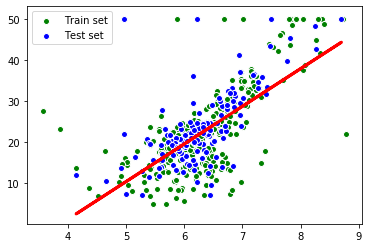

In [10]:

#costruiamo due scatterplot: uno per i dati di addestramento e uno per quelli di test.

plt.scatter(X_train, Y_train, c="green", edgecolor="white", label = "Train set")
plt.scatter(X_test, Y_test, c="blue", edgecolor="white", label="Test set")

plt.legend(loc="upper left")

plt.plot(X_test, Y_pred, color='red', linewidth = 3) 

La retta approssima i dati abbastanza bene. La maggior parte dell'errore è dovuto agli outlayers, ovvero dai dati ai margini che si distaccano di molto dagli altri dati. Per avere un modello piu robusto ed efficeiente dobbiamo aggiungere ulteriori proprieta.

## Regressione lineare multipla:
E' una regressione lineare eseguita con due o più proprietà

aggiungiamo una nuova proprieta (feature) al nostro dataset, ovvero una nuova colonna:
ora abbiamo un informazione in piu che possiamo usare per migliorare il nostro modello.
Prendiamo l'equazione del nostro modello ed aggiungiamo un nuovo termine, ovvero la nuova proprieta e il nuovo peso che va ottimizzato per questa. Geometricamente quello che succede è che aggiungiamo una nuova dimensione. La relazione non è piu definita da una retta ma da un piano. 
Quindi una regressione lineare multipla è una regressione in cui per costruire il nostro modello usiamo due o piu proprieta.
Nel caso di regressione lineare multipla il bias è unico, mentre i pesi sono multipli, in particolare sono iuno per ogni proprieta e sono rappresentati come un vettore di pesi
    

#### Regression elineare multipla in python

Il nostro dataset contiene 14 proprieta, noi proveremo ad usarle tutte.

importiamo le librerie che ci serviranno e carichiamo il nostro dataset in un dataframe:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


nelle risorse relative a questa lezione vengono spiegati i signifiat di ogni proprieta...

In [13]:
#diamo uno sguardo al tipo di dati:
boston.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM      506 non-null float64
ZN        506 non-null float64
INDUS     506 non-null float64
CHAS      506 non-null int64
NOX       506 non-null float64
RM        506 non-null float64
AGE       506 non-null float64
DIS       506 non-null float64
RAD       506 non-null int64
TAX       506 non-null float64
PRATIO    506 non-null float64
B         506 non-null float64
LSTAT     506 non-null float64
MEDV      506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


tutte le proprieta sono delle variabili continue mentre 2 sono variabili categoriche. Chas è una variabile di comodo (dummy), quindi puo valere 0 o 1...


Ora vogliamo fare una regressione lineare multipla con solo 2 di queste proprieta. Come facciamo a scegliere quale conviene usare? Usiamo il metodo .corr del dataframe, che ci permette di vedere la correlazione fra le varie colonne: 
Un valore tendente a -1 indica una correlazione inversa (quindi all'aumentare di una colonna segue il diminuire dell'altra)
un valore tendente a 0 indica una correlazione inesistente o scarsa
un valore tendente a 1 indica una correlazione diretta( all'aumentare di una aumenta anche l'altra)

In [14]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Per visualizzare questa matrice delle correlazioni in maniera piu chiara possimao farlo con una heatmap, e per farlo dobbiamo usare seaborn, che una libreria grafica che si appoggia a matplotlib per creare visualizzazioni e grafici eleganti in poche righe di codice.

In [15]:
import seaborn as sns

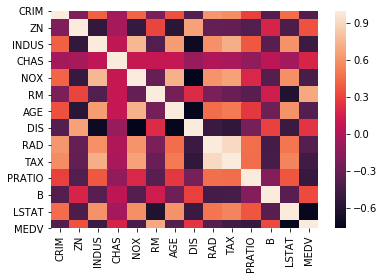

In [16]:
# creiamo la heatmap
sns.heatmap(boston.corr(), xticklabels = boston.columns, yticklabels = boston.columns)

osservando la heatmap si nota che la proprieta legata al numero di stanze (RM) abbia una correlazione diretta abbastanza forte con il valore (MEDV), mentra LSTAT,che inidca la percentuale di gente povera nella citta, ha una correlaizione inversa piuttosto forte con il valore.

Prendiamo le colonne che hanno una correlazione piu forte con il valore, e creiamo una heatmap solo con queste , ma questa volta inserire anche il valore numerico nella heatmap:


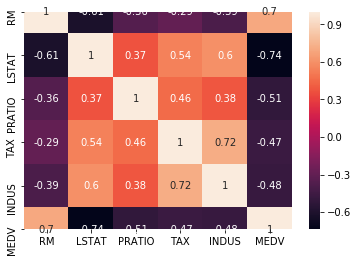

In [17]:
#dobbiamo prima di tutto specificare quali colonne utilizzare:

cols = ["RM", "LSTAT", "PRATIO", "TAX", "INDUS", "MEDV"]

sns.heatmap(boston[cols].corr(),
           xticklabels = boston[cols].columns,
           yticklabels = boston[cols].columns,
           annot = True,
           annot_kws = {"size" :10})

come avevamo gia intuito la correlazione fra RM, LSTAT e MED è abbastanza forte, le altre non sono al loro livello.
Per avere informazioni in piu su come sono definite queste correlazioni, possiamo usare il metodo perplot si deaborn per creare dei grafici a coppie:


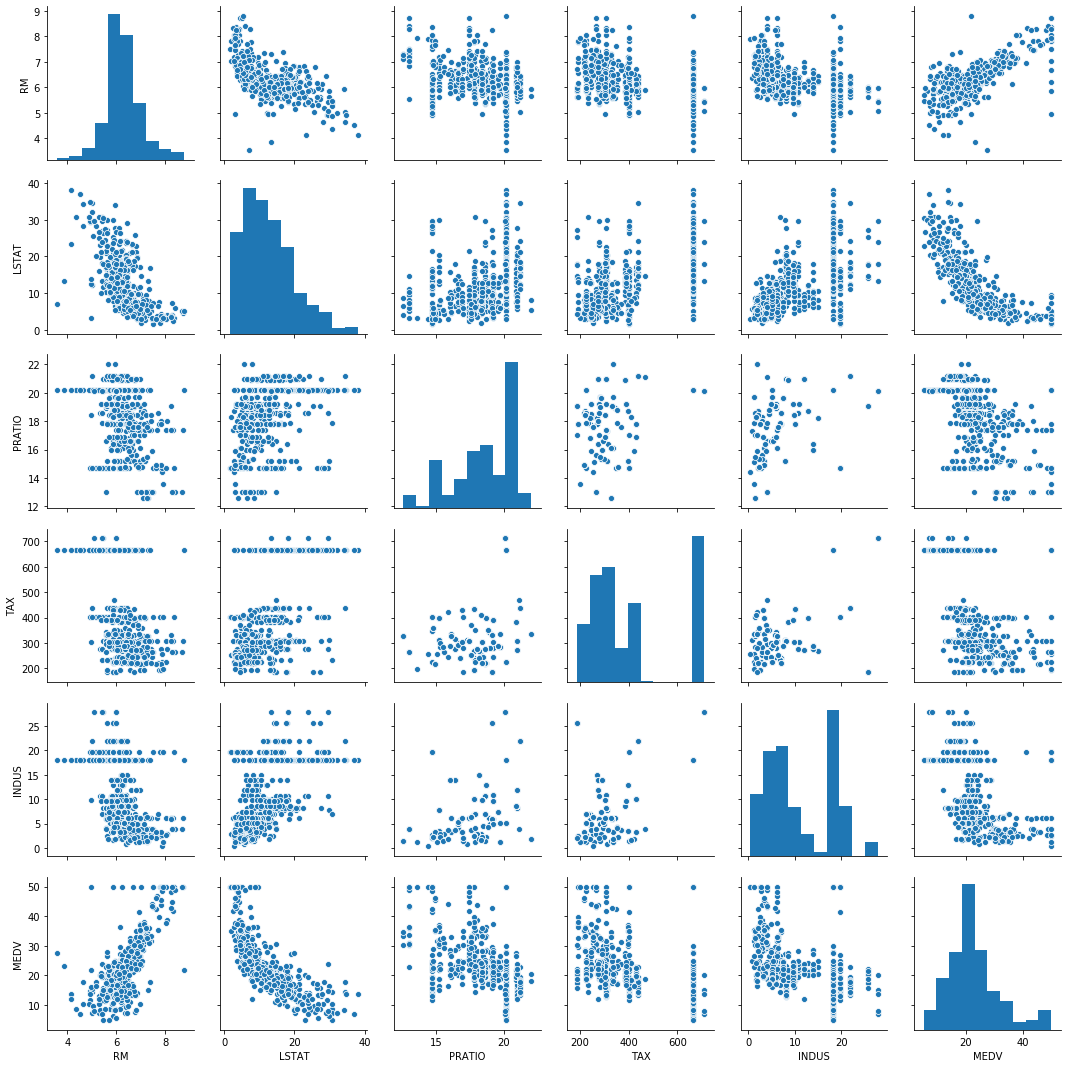

In [18]:
sns.pairplot(boston[cols])

a noi interessano solo i grafici con MEDV sull'asse y, ovvero quelli dell'ultima riga. Come si puo vedere la correlazione fra MEDV e RM e con LSTAT è ben definita. 


Ora posiamo passare alla creazione del nostro modello usando queste due proprieta. Vogliamo fare un modello che ci restituisca il valore dell'appartamento (MEDV) in base al numero delle stanze (RM) e alla percentuale di popolazione povera (LSTAT)

In [19]:
# creiamo due array numpy: uno con le proprieta RM e LSTAT e l'altro con il target MEDV

X = boston[["RM", "LSTAT"]].values
Y = boston["MEDV"].values

In [20]:
# adesso creiamo i set per training e test:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
# random state =0 serve ad ottenere una certa consistenza tra il punteggio che otteremo ora 
#e quello che ptteremo quando useremo tutte le proprieta

In [21]:
ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

Ora che abbiamo il nostro modello, valutiamolo con l'errore quadratico medio e il coefficiente di indeterminazione:


In [22]:
print("MSE: " + str(mean_squared_error(Y_test, Y_pred)))

MSE: 32.72507169281496


In [23]:
print("R2 scor: " + str(r2_score(Y_test, Y_pred)))

R2 scor: 0.6069792285352371


Sia errore che punteggio sono migliori di quelli ottenuti usando una sola proprieta

Oa proviamo ad eseguire la regressione usando tutte le proprieta del nostro dataset:

In [24]:
X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Questa volta eseguiamo la standardizazione del dataset perche abbiamo tante proprieta che hanno valori s scale diverse fra loro

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [26]:
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

nel primo caso usiamo fittrasform perche usiamo il trainset per creare il modello che servira per eseguire la standardizzazione e lo applicheremo al trainset,
mentre per testset utilizzeremo il modello gia creato sul trainset.

In [27]:
#ora possiamo eseguire la regressione:

ll = LinearRegression()
ll.fit(X_train_std, Y_train)

#ora eseguiamo la predizione

Y_pred = ll.predict(X_test_std)


In [28]:

#e la valutiamo:

print("MSE: " + str(mean_squared_error(Y_test, Y_pred)))


MSE: 27.195965766883205


In [29]:
print("R2 score: " + str(r2_score(Y_test, Y_pred)))

R2 score: 0.6733825506400195


sia errore che punteggio sono migliori rispetto a quelli ottenuti usando solo due proprietà
Osserviamo ora i pesi che il modello ha assegnato ai pesi di ognuna delle proprieta:

In [30]:
list(zip(boston.columns, ll.coef_))

[('CRIM', -1.01190058959815),
 ('ZN', 1.0502802743032686),
 ('INDUS', 0.0792096646726997),
 ('CHAS', 0.6189619959077605),
 ('NOX', -1.873691017163078),
 ('RM', 2.7052697851113185),
 ('AGE', -0.2795726389183),
 ('DIS', -3.09766486386906),
 ('RAD', 2.0968999836727598),
 ('TAX', -1.8860633909786884),
 ('PRATIO', -2.2611046607987713),
 ('B', 0.5826430949043772),
 ('LSTAT', -3.440498377942625)]

RM e LSTAT sono effettivamente le proprieta con peso maggiore, ma anche altre si sono rivelate utili alla costruzione dle modello, come RAD, DIS e NOX.

## Regressione polinomiale

La regressione polinomiale è un caso particolare di regressione multipla, in cui creiamo delle nuove proprieta facendo divetare l'equazione lineare un polinomio

#### regressione polinomiale in python

In [31]:
#importiamo le librarie necessarie e carichiamo il dataset all'interno di un dataframe:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', 
                     names=["CRIM", "ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PRATIO","B","LSTAT","MEDV"])
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


per prima cosa creiamo un modello usando un unica proprieta: 
Quale proprieta scegleire?
prima abbiamo visto quali sono le proprieta che hanno maggior peso nella regressione.
creiamo una lista contenete queste sole proprieta: RM, LSTAT, DIS, RAD e MEDV:

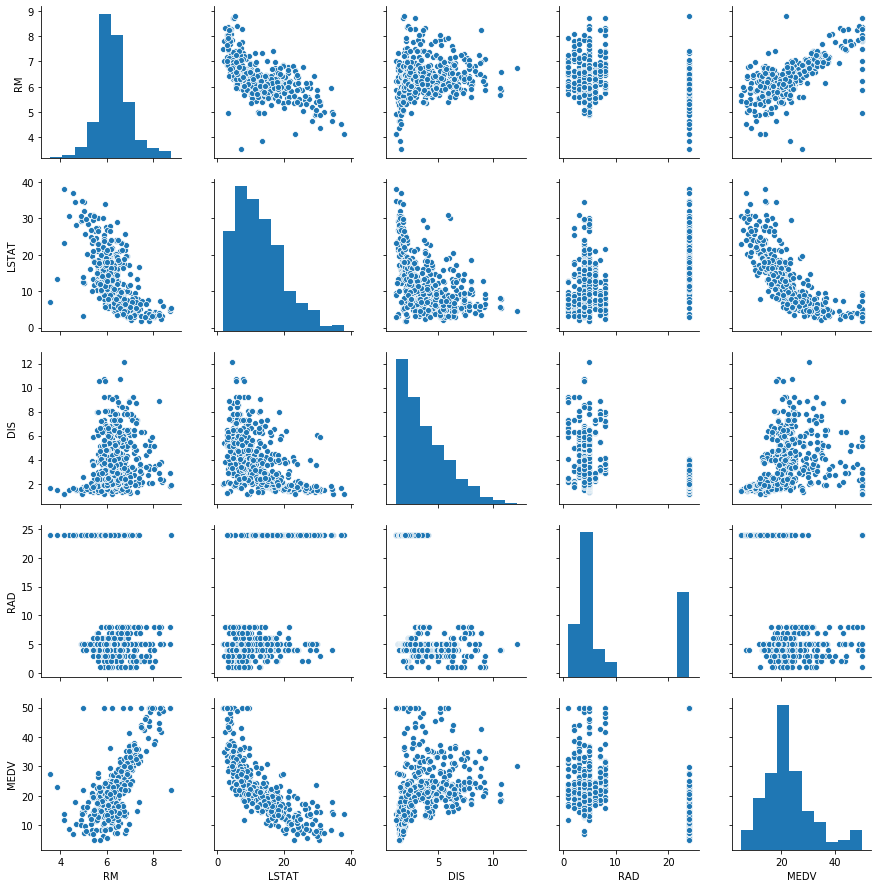

In [32]:
cols = ["RM", "LSTAT", "DIS", "RAD", "MEDV"]

# ora uiamo il metodo pairplot di seaborn per visualizzare la relazione fra tutte queste proprieta:

sns.pairplot(boston[cols])

la relazione fra LSTAT e MEDV è chiaramente non lineare dato che puo essere approssimata al meglio solamente tramite una curva
Quindi LSTAT sembra essere una buona proprieta da usare per la nostra regressione polinomiale

In [33]:
#cominciamo creando i nostri array numpy: uno con la proprieta LSTAT e uno con il target MEDV:
X = boston[["LSTAT"]].values #con la doppia parentesi quadra si crea un array bidimensionale
Y = boston["MEDV"].values # con la parentesi quadra singola si crea un array monodimensionale
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
        

Per eseguire una regressione polinomiale con SciKitLEarn dobbiamo creare delle proprieta aggiuntive che non sono altro che una combinazione polinomiale delle proprieta che gia abbiamo, fino al grado che vogliamo noi. Per farlo possiam usare la classe PolinomialFeatures

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
# instanziamo la classe, specificando il grado desiderato:
polyfeats = PolynomialFeatures(degree=2)

In [36]:
# creiamo i nuovi array con le nuove features:

X_train_poly = polyfeats.fit_transform(X_train)
X_test_poly = polyfeats.transform(X_test)

In [37]:
#  facciamo un confronto tra il vecchio trainset e quello nuovo costituito da polinomi.
X_train[:3]

array([[34.41],
       [ 7.73],
       [16.96]])

In [38]:
X_train_poly[:3]

array([[1.0000000e+00, 3.4410000e+01, 1.1840481e+03],
       [1.0000000e+00, 7.7300000e+00, 5.9752900e+01],
       [1.0000000e+00, 1.6960000e+01, 2.8764160e+02]])

adesso ci sono tre colonne contro una che c era in quello vecchio:
la prima corrisponde alla potenza al grado zero del valore, che quindi vale 1.
la secnda corrisponde al valore elevato alla 1, e quindi al valore stesso.
la terza corrisponde al valore elevato alla secoda, ovvero al grado massimo del polinomio che abbiamo specificato.

Ora che abbiamo le nostre proprieta polinomiali possiamo proseguire con la regressione lineare, come avremmo fatto nel caso semplice.


Per fare un confronto con i risultati che avremmo ottenuto nel caso di polinomi di diverso grado, possiamo creare un ciclo for in cui effettuiamo la regressione con diversi gradi, dal grado 1 al 10:


In [43]:
for i in range(1,11):
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print("Degree " + str(i)+": MSE=" + str(mse)+" R2=" + str(r2))

Degree 1: MSE=39.81715050474416 R2=0.5218049526125568
Degree 2: MSE=33.60239474228595 R2=0.5964427754767518
Degree 3: MSE=32.09167657344179 R2=0.6145861618613058
Degree 4: MSE=29.843976067638522 R2=0.6415805408226356
Degree 5: MSE=29.84701333665813 R2=0.6415440639029076
Degree 6: MSE=29.5482979569237 R2=0.6451315686177527
Degree 7: MSE=29.671713627516954 R2=0.6436493740935447
Degree 8: MSE=31.82327509909759 R2=0.6178096033712046
Degree 9: MSE=30.460452196211786 R2=0.6341768007814894
Degree 10: MSE=35.37825532046339 R2=0.5751150882221386


notiamo che il modello migliora notevolmente passando dal grado 2 al grado 4, passando da r2=0.52 a r2=0.64
poi peggiora fino al grado 10, a causa dell' OVERFITTING, di cu parleremo piu avanti.

vediao cosa succede facendo una regressione polinomiale usando tutte le proprieta del dataset

In [44]:
X = boston.drop("MEDV", axis=1).values
Y = boston["MEDV"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [45]:
#Questa volta facciamo i polinomi solo fino al grado 4:

for i in range(1,5):
    polyfeats = PolynomialFeatures(degree=i)
    X_train_poly = polyfeats.fit_transform(X_train)
    X_test_poly = polyfeats.transform(X_test)
    
    ll = LinearRegression()
    ll.fit(X_train_poly, Y_train)
    Y_pred = ll.predict(X_test_poly)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    print("Degree " + str(i)+": MSE=" + str(mse)+" R2=" + str(r2))


Degree 1: MSE=27.195965766883294 R2=0.6733825506400185
Degree 2: MSE=29.004173863257005 R2=0.6516663769467563
Degree 3: MSE=85912.07686684349 R2=-1030.7847748446723
Degree 4: MSE=546667.217124897 R2=-6564.350671365967


A causa dell'eccessiva complessita il modello peggiora in maniera drastica.
Però al grado 1, quindi senza polinomi, il modello ottiene un punteggio migliore di quello che si ottiene con un polinomio di grado 4 con una sola proprieta. Questo perche diverse proprieta multiple racchiudono piu informazioni della combinazione di polinomi di un unica proprieta.